In [2]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score

In [5]:
# load dataset
data = pd.read_csv('house price.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# drop id, it is just a number given to identify each house
data.drop('id', axis=1, inplace=True)

data.shape

(21613, 20)

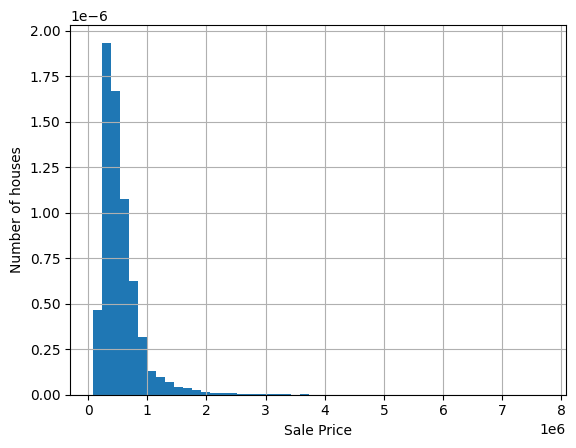

In [7]:
# histogran to evaluate target distribution

data['price'].hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

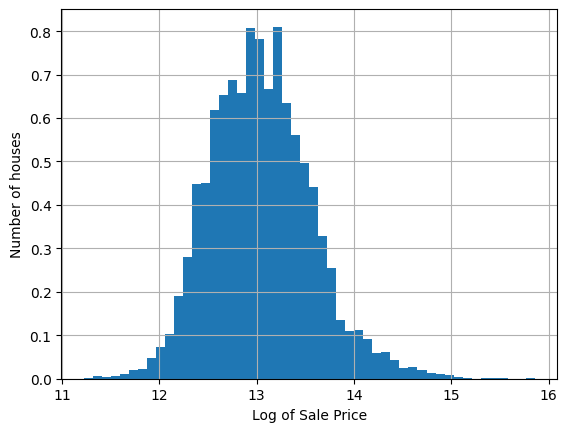

In [8]:
# let's transform the target using the logarithm

np.log(data['price']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Log of Sale Price')
plt.show()

In [9]:
# let's identify the categorical variables
# we will capture those of type *object*

cat_vars = [var for var in data.columns if data[var].dtype == 'O']
print(cat_vars)
# MSSubClass is also categorical by definition, despite its numeric values
# (you can find the definitions of the variables in the data_description.txt
# file available on Kaggle, in the same website where you downloaded the data)

# number of categorical variables
len(cat_vars)

['date']


1

In [10]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
print(vars_with_na)
# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

[]


Series([], dtype: float64)

In [11]:
# now let's identify the numerical variables

num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'SalePrice'
]

# number of numerical variables
len(num_vars)

19

In [12]:
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

In [13]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  19


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
data = data.drop('date', axis = 1)

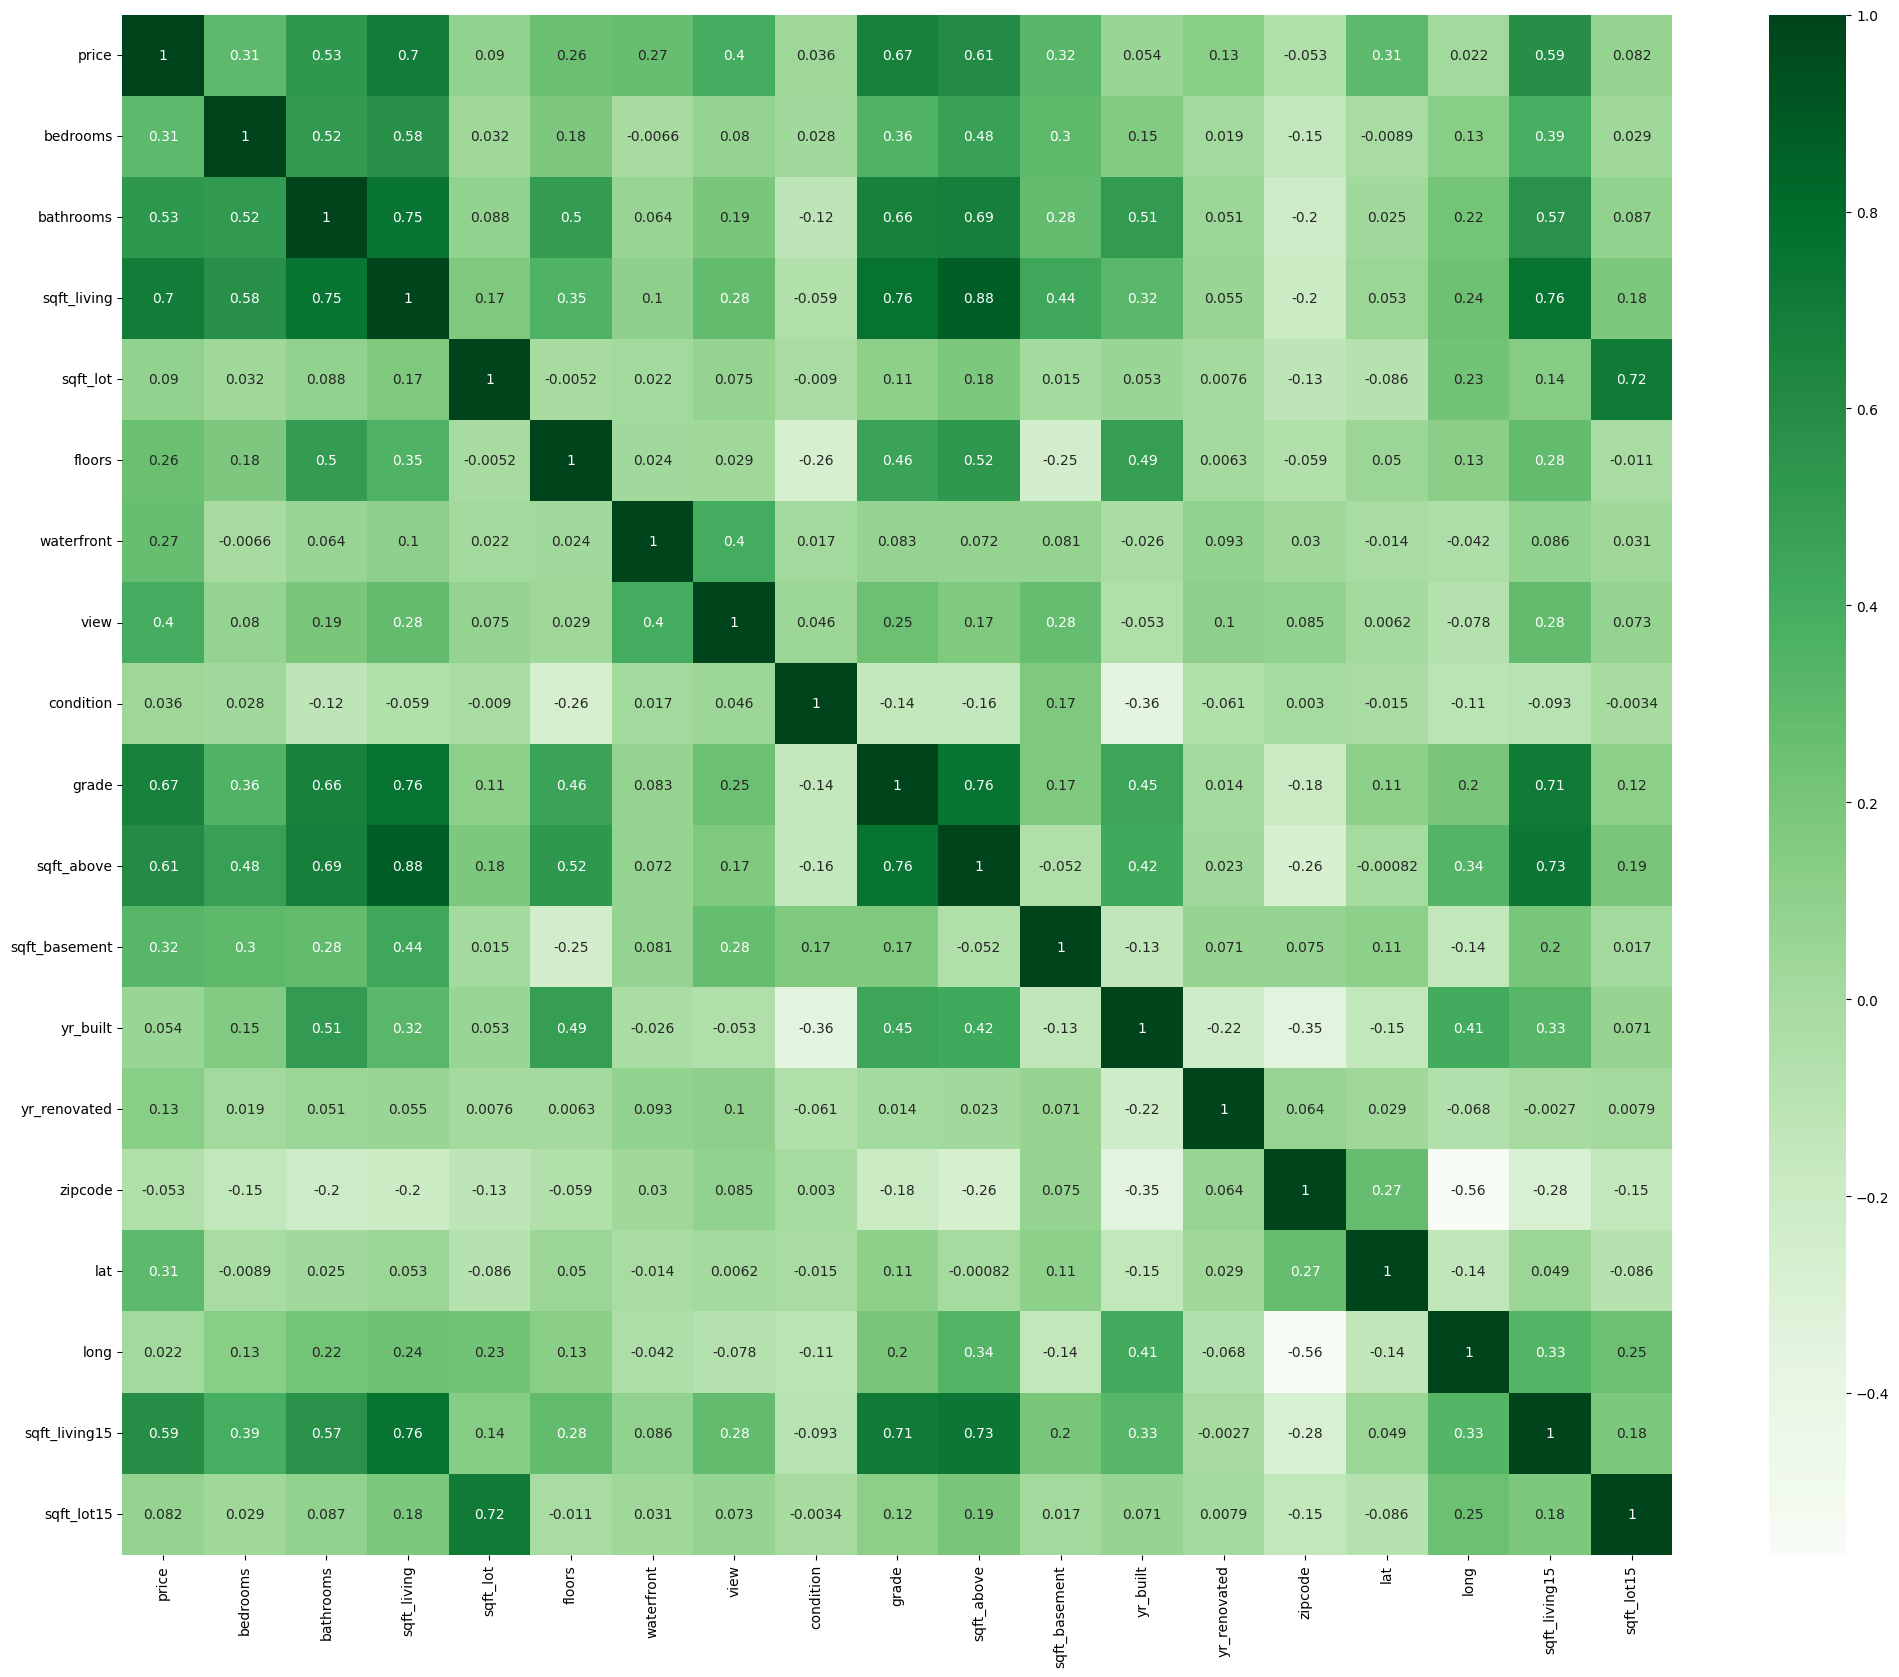

In [15]:
corr = data.corr()

fig , ax = plt.subplots(figsize=(25 , 20))


sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens');

In [16]:
X = data.drop(columns=['price','bathrooms','grade','sqft_above','sqft_living15','sqft_lot15'],axis=1)
y = data['price']

In [17]:
X1 = data.drop(columns=['price'])
y1 = data['price']

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17290, 13)
y_train shape: (17290,)
X_test shape: (4323, 13)
y_test shape: (4323,)


In [19]:
X1_train , X1_test , y1_train , y1_test = train_test_split(X1 ,y1 ,test_size=0.2 , random_state=42 )
print("X1_train shape:", X1_train.shape)
print("y1_train shape:", y1_train.shape)
print("X1_test shape:", X1_test.shape)
print("y1_test shape:", y1_test.shape)

X1_train shape: (17290, 18)
y1_train shape: (17290,)
X1_test shape: (4323, 18)
y1_test shape: (4323,)


In [20]:
y_mean = y_train.mean()
y_pred_baseline= [y_mean] * len(y_train)
print("Mean apt price:", y_mean)

print("Baseline MAE:", mean_absolute_error(y_train,y_pred_baseline))

Mean apt price: 537768.04794679
Baseline MAE: 231680.0768070218


In [21]:
mod_perform = pd.DataFrame(columns=['model','Training Score','Testing Score','MSE','MAE'])
def performance(model,X_train,y_train,y_pred,y_test):
    perform = []
    perform.append(type(model).__name__)
    perform.append(model.score(X_train,y_train))
    perform.append(r2_score(y_test,y_pred))
    perform.append(mean_squared_error(y_test,y_pred))
    perform.append(mean_absolute_error(y_test,y_pred))
    return perform

In [22]:
RL= LinearRegression()
RL.fit(X_train,y_train)
RL_pred = RL.predict(X_test)
mod_perform.loc[len(mod_perform)] = performance(RL,X_train,y_train,RL_pred,y_test)

In [23]:
lasso = Lasso(max_iter=2000)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
mod_perform.loc[len(mod_perform)] = performance(lasso,X_train,y_train,lasso_pred,y_test)

In [24]:
AD = DecisionTreeRegressor()
AD.fit(X_train,y_train)
AD_pred = AD.predict(X_test)
mod_perform.loc[len(mod_perform)] = performance(AD,X_train,y_train,AD_pred,y_test)

In [25]:
import mlflow

C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydantic\_internal\_fields.py:128: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydantic\_internal\_config.py:317: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [26]:
predictions = AD_pred
mse = mean_squared_error(y_test, predictions)

mlflow.log_param("model", "Lasso")
mlflow.log_metric("mse", mse)

mlflow.sklearn.log_model(lasso, "Lasso")

In [33]:
pip uninstall scikit-learn

^C
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install scikit-learn==1.3.2

  Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl (9.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: C:\Users\PC\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [43]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: feature-engine, hmmlearn, mlflow, skl2onnx
Note: you may need to restart the kernel to use updated packages.


In [27]:
Ad1 = DecisionTreeRegressor()
Ad1.fit(X1_train,y1_train)
Ad1_pred = Ad1.predict(X1_test)
mod_perform.loc[len(mod_perform)] = performance(Ad1,X1_train,y1_train,Ad1_pred,y1_test)

In [28]:
X1_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,98042,47.3670,-122.152,2750,13095
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
17614,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,98146,47.4838,-122.335,1170,7800
16970,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,98031,47.3951,-122.172,1800,7350
20868,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,98034,47.7043,-122.209,2090,10454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,1.50,1000,6914,1.0,0,0,3,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947
21575,3,2.50,3087,5002,2.0,0,0,3,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183
5390,3,2.50,2120,4780,2.0,0,0,3,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650
860,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000


In [29]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
mod_perform.loc[len(mod_perform)] = performance(rf,X_train,y_train,rf_pred,y_test)

In [30]:
rf1 = RandomForestRegressor()
rf1.fit(X1_train,y1_train)
rf1_pred = rf1.predict(X1_test)
mod_perform.loc[len(mod_perform)] = performance(rf1,X1_train,y1_train,rf1_pred,y1_test)

In [31]:
# Decision Tree with feature selection
xgbr = XGBRegressor()
xgbr.fit(X_train,y_train)
xgbr_pred = xgbr.predict(X_test)
mod_perform.loc[len(mod_perform)] = performance(xgbr,X_train,y_train,xgbr_pred,y_test)

In [32]:
#Decision Tree without feature selection
xgbr1 = XGBRegressor()
xgbr1.fit(X1_train,y1_train)
xgbr1_pred = xgbr1.predict(X1_test)
mod_perform.loc[len(mod_perform)] = performance(xgbr1,X1_train,y1_train,xgbr1_pred,y1_test)

In [33]:
display(mod_perform)

,model,Training Score,Testing Score,MSE,MAE
0,LinearRegression,0.661631,0.665151,5.062132e+10,137856.715665
1,Lasso,0.661631,0.665148,5.062186e+10,137856.280850
2,DecisionTreeRegressor,0.999234,0.654780,5.218917e+10,109954.247745
3,DecisionTreeRegressor,0.999236,0.737376,3.970267e+10,103146.882373
4,RandomForestRegressor,0.981439,0.846942,2.313881e+10,75538.209997
5,RandomForestRegressor,0.982923,0.848126,2.295987e+10,73313.485107
6,XGBRegressor,0.969923,0.877095,1.858038e+10,73922.768204
7,XGBRegressor,0.976465,0.855126,2.190161e+10,71751.380160


In [36]:
import mlflow
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# mlflow.set_tracking_uri("http://localhost:5000")

def log_model_performance(model, X_train, y_train, X_test, y_test, model_name):
    try:
        with mlflow.start_run():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mse)

            mlflow.log_param("model", model_name)
            mlflow.log_metrics({
                "mse": mse,
                "mae": mae,
                "r2": r2,
                "rmse": rmse
            })
            mlflow.sklearn.log_model(model, model_name)
    except Exception as e:
        print(f"Error occurred: {e}")

# Assuming RL, lasso, Ad1, rf1, xgbr1 are instantiated models
log_model_performance(RL, X_train, y_train, X_test, y_test, "Linear Regression")

log_model_performance(lasso, X_train, y_train, X_test, y_test, "Lasso")

log_model_performance(Ad1, X1_train, y1_train, X1_test, y1_test, "Decision Tree")

log_model_performance(rf1, X1_train, y1_train, X1_test, y1_test, "Random Forest")

log_model_performance(xgbr1, X1_train, y1_train, X1_test, y1_test, "XGBoost")


C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors 

In [35]:
mlflow.end_run()

In [37]:
# By the table, it apears that the best model is Dt1
mlflow.sklearn.log_model(Ad1, "best_model")

In [52]:
    !pip install skl2onnx

You should consider upgrading via the 'C:\Users\PC\Documents\UM6P\S3\Cloud Native AI and ML II\Assignement\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [53]:
!pip install onnxmltools onnxruntime

You should consider upgrading via the 'C:\Users\PC\Documents\UM6P\S3\Cloud Native AI and ML II\Assignement\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [54]:
pip install onnx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: C:\Users\PC\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [38]:
import numpy as np
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn
import onnx


feature_count = X1_train.shape[1]
input_data_type = [('input', FloatTensorType([None, feature_count]))]

onnx_model = convert_sklearn(Ad1, initial_types=input_data_type)
onnx.save_model(onnx_model, '../best_model.onnx')

In [ ]:
!pip install pickle

In [56]:
import pickle

# Assuming Ad1 is your model
model = Ad1

# Save the model to a file with .pkl extension
with open('../best_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [39]:
import pickle

pickle.dump(Ad1, open('../model.pkl','wb'))

In [1]:
!pip freeze > requirements.txt